# 0. Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import re
from shark_functions import *
import matplotlib.pyplot as plt

# 1. Read csv and columns

In [2]:
df = pd.read_csv("df_clean.csv", encoding = "latin-1")
print(df.shape)
df

(3285, 10)


,type,country,activity,sex,age,fatal (y/n),species,month,year,decades
0,boat,usa,paddle,F,57,N,white,Jun,2018,"[2010, 2020)"
1,unprovoked,usa,standing,F,11,N,unknown,Jun,2018,"[2010, 2020)"
2,invalid,usa,surfing,M,48,N,unknown,Jun,2018,"[2010, 2020)"
3,unprovoked,brazil,swimming,M,18,Y,tiger,Jun,2018,"[2010, 2020)"
4,unprovoked,usa,fishing,M,52,N,lemon,May,2018,"[2010, 2020)"
...,...,...,...,...,...,...,...,...,...,...
3280,unprovoked,australia,washing his feet,M,12,Y,unknown,Jan,1837,"[1830, 1840)"
3281,unprovoked,usa,fishing,M,52,Y,unknown,Jul,1830,"[1830, 1840)"
3282,unprovoked,sierra leone,"british ship, britannia, was loading lumber. ...",M,17,N,unknown,Sep,1828,"[1820, 1830)"
3283,unprovoked,sri lanka,swimming,M,22,Y,unknown,May,1817,"[1810, 1820)"


In [3]:
df.columns

Index(['type', 'country', 'activity', 'sex', 'age', 'fatal (y/n)', 'species',
       'month', 'year', 'decades'],
      dtype='object')

In [4]:
df.isnull().sum()

type            0
country         0
activity        0
sex            35
age             0
fatal (y/n)     0
species         0
month           0
year            0
decades         0
dtype: int64

In [12]:
df.loc[df.sex].isnull()

ValueError: cannot index with vector containing NA / NaN values

# 2. General analysis

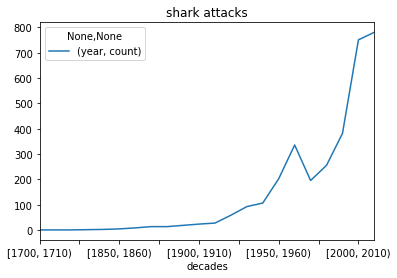

In [5]:
#we observe number of attacks by decade
decs = df.groupby(["decades"]).agg({"year":["count"]})
decs.plot(title = "shark attacks")

In [6]:
fatal = df[df["fatal (y/n)"]=="Y"].decades.value_counts()
no_fatal = df[df["fatal (y/n)"]=="N"].decades.value_counts()
unknown = df[df["fatal (y/n)"]=="UNKNOWN"].decades.value_counts()

In [7]:
attacks = df.groupby(["fatal (y/n)"]).agg({"fatal (y/n)":"count"})
attacks = attacks.rename(columns={"fatal (y/n)": "count"})
attacks = attacks.sort_values("count", ascending=False)
print(attacks.sum())
attacks

count    3285
dtype: int64


,count
fatal (y/n),
N,2485
Y,583
UNKNOWN,217


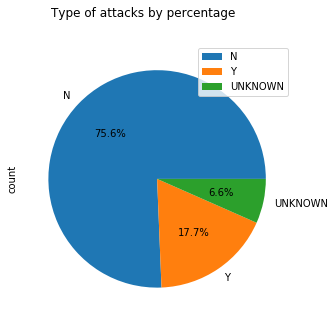

In [8]:
attacks.plot(title = "Type of attacks by percentage", kind = "pie", autopct='%1.1f%%', subplots=True, figsize = (15,5))
plt.show()

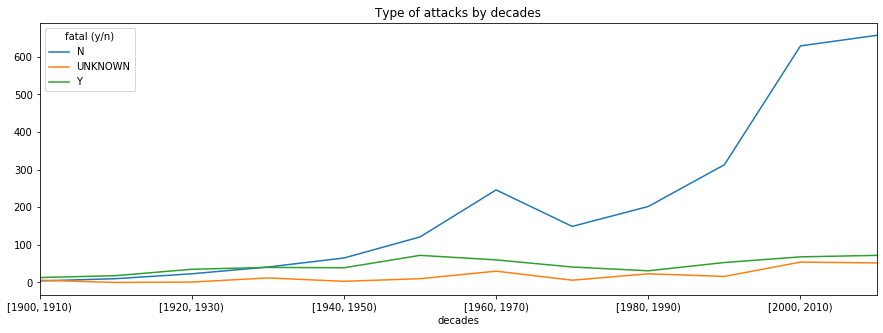

In [9]:
decades = pd.crosstab(index=df.decades[df['year']>1900], columns=df["fatal (y/n)"])
decades.plot(title = "Type of attacks by decades", figsize = (15,5))
plt.show()

In [10]:
species = pd.crosstab(index=df.species[df['species']!="unknown"], columns=df["fatal (y/n)"]).sort_values("N",ascending=False)
killers = species[species.Y!=0]
killers

fatal (y/n),N,UNKNOWN,Y
species,,,
white,298,1,124
tiger,138,0,49
bull,101,1,24
whaler,43,0,3
mako,23,0,2
zambesi,17,0,4
blue,14,1,5
galapagos,4,0,2


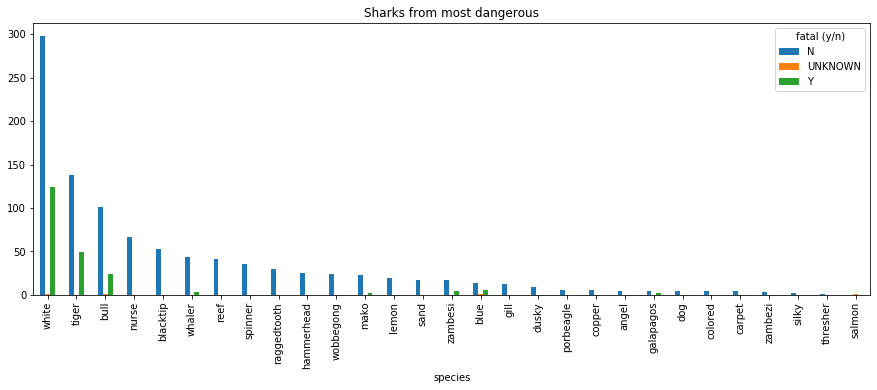

In [11]:
species.plot(title = "Sharks from most dangerous", kind = "bar", figsize = (15,5))
plt.show()